In [1]:
import gpxo
from IPython.display import display, Image
%matplotlib inline

In [2]:
track = gpxo.Track('ExampleTrack.gpx')

# See all track data

In [3]:
track.data

,latitude (°),longitude (°),time,elevation (m),distance (km),compass (°),duration (s),velocity (km/h)
0,45.84066,4.83077,2020-10-29 07:45:38.000,168.71,0.000000,NaN,0.000,NaN
1,45.84059,4.83076,2020-10-29 07:45:40.000,168.88,0.007819,188.129320,2.000,14.0742
2,45.84053,4.83068,2020-10-29 07:45:42.000,168.74,0.016935,233.127421,4.000,16.4088
3,45.84054,4.83053,2020-10-29 07:45:44.000,168.79,0.028641,273.814446,6.000,21.0708
4,45.84055,4.83042,2020-10-29 07:45:46.000,169.09,0.037258,275.194933,8.000,15.5106
...,...,...,...,...,...,...,...,...
5115,45.78807,4.80904,2020-10-29 10:36:18.999,184.59,19.302767,102.995838,10240.999,19.1592
5116,45.78803,4.80918,2020-10-29 10:36:20.999,184.54,19.314526,105.946868,10242.999,21.1662
5117,45.78800,4.80933,2020-10-29 10:36:22.999,184.29,19.326657,101.311004,10244.999,21.8358
5118,45.78797,4.80950,2020-10-29 10:36:24.999,184.21,19.340290,100.008934,10246.999,24.5394


# Plots

Since `track.data` is a pandas dataframe, one can directly use pandas plotting functions to visualize the data, e.g.
```python
track.data.plot(y='distance (km)', style='.-')
track.data.plot(y='velocity (km/h)', grid=True, style='-r')
track.data.plot(x='distance (km)', y='elevation (m)', grid=True, style='-g')
track.data.plot(x='distance (km)', y='compass (°)', grid=True, style='.k', ylim=(0, 360))
```
but the module also provides ways to plot the data more quickly with the `plot()`
method:

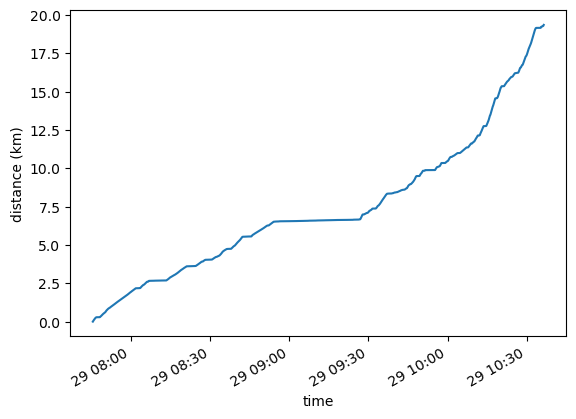

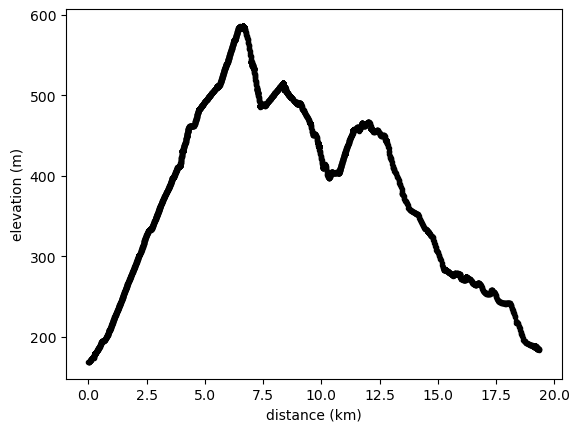

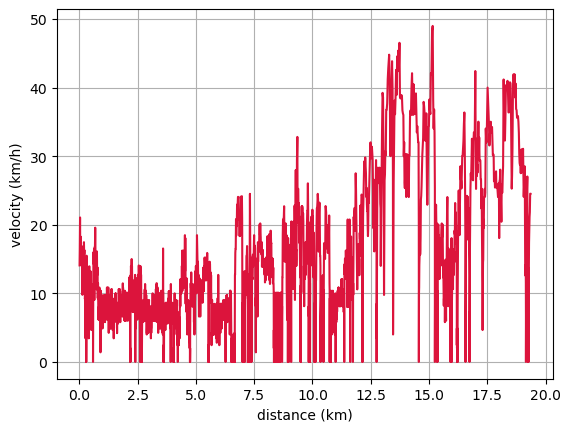

In [4]:
track.plot('td')         # distance as a function of time
track.plot('dz', '.-k')  # accepts regular matplotlib ax.plot() args/kwargs

# Also returns a matplotlib axes object one can work with:
ax = track.plot('dv', c='crimson')
ax.grid()

# Smoothing

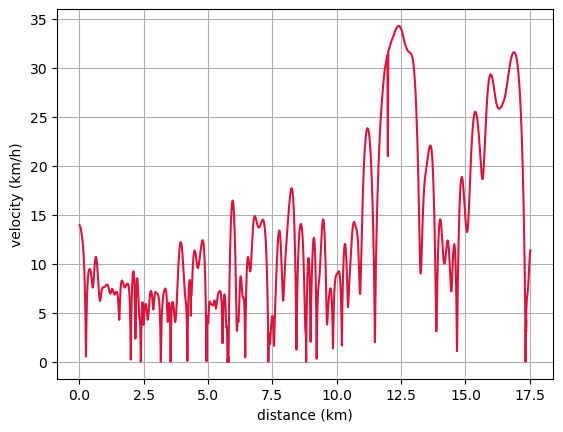

In [5]:
track.smooth(n=51)
ax = track.plot('dv', c='crimson')
ax.grid()

# Plot path on map

## With folium

In [14]:
mymap = track.folium_map(zoom_start=14, tiles='OpenTopoMap', color='blue')

In [15]:
# Show in a web browser (this is a folium method)
mymap.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [13]:
# Save as html
mymap.save('_folium_map.html')

## With mplleaflet

**NOTE** mplleaflet has not been maintained for a long time and is only compatible with old versions of matplotlib.
Prefer using folium if possible (see above)

Open map in a new window:

In [ ]:
track.mplleaflet_map('esri_worldtopo')

Map type can be passed as an argument. Available maps (among others):
- `'osm'` for OpenStreetMap
- `'esri_aerial'` for satellite images
- `'esri_worldtopo'` for topographic map.

See https://github.com/jwass/mplleaflet/blob/master/mplleaflet/maptiles.py for other options

Embed map in Jupyter Notebook:

In [ ]:
track.mplleaflet_map(embed=True)

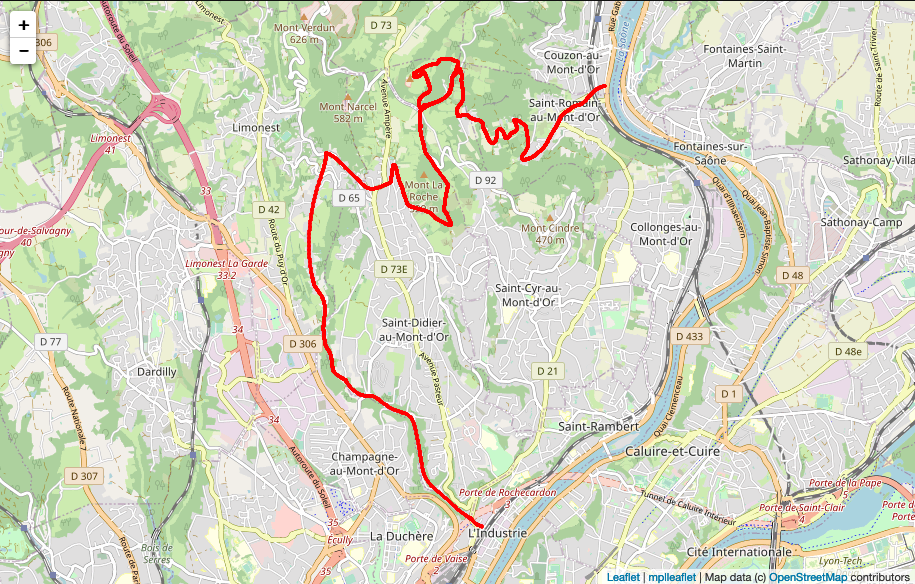

In [ ]:
display(Image(filename='media/map.png'))

It is also possible to use a scatter plot to color the path according to one of the quantities, e.g. to color by elevation:

In [ ]:
track.mplleaflet_map(plot='scatter', c=track.elevation, cmap='plasma')

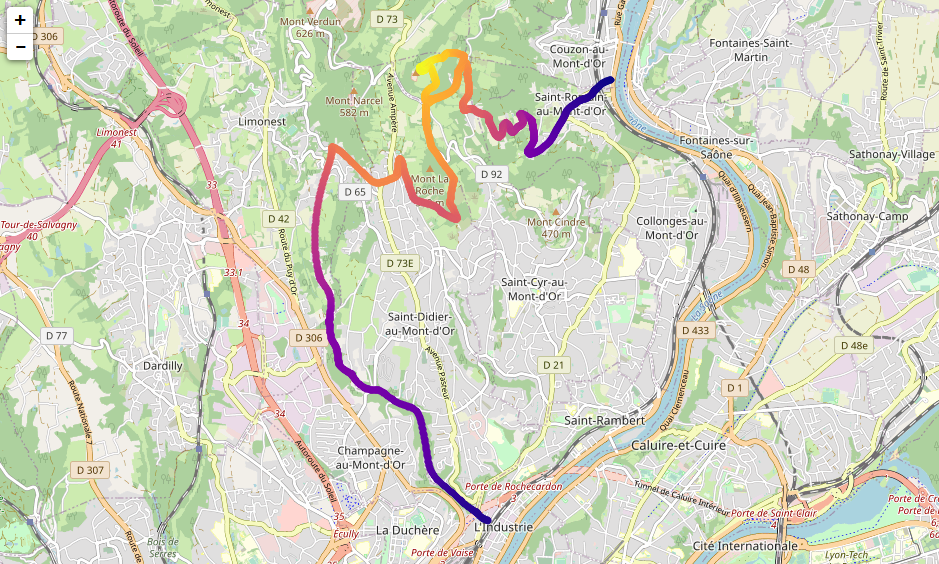

In [ ]:
display(Image(filename='media/map-elev.png'))